In [93]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns

In [94]:
with open('df_text.pickle', 'rb') as handle:
    df_text = pickle.load(handle)
    
with open('df_meta.pickle', 'rb') as handle:
    df_meta = pickle.load(handle)

with open('GCC.pickle', 'rb') as handle:
    DG = pickle.load(handle)

In [95]:
df_text

,Name,Race,Affiliation,Clean Text,Out Links
0,Terokk,Arakkoa,0,Terokk was the greatest king of the arakkoa. T...,"[Anzu, Darkweaver_Syth, Hazzik, Isfar, Kirrik_..."
1,Talon_King_Ikiss,Arakkoa,Other,"Talon King Ikiss (pronounced Eye-kiss), the bo...","[Anzu, Darkweaver_Syth, Reshad, Sethe, Terokk]"
2,Archimonde,Man'ari eredar,Other,Archimonde (pronounced ARK-i-mond) was one of ...,"[Alexstrasza, Anetheron, Archimindy, Azgalor, ..."
3,Kil'jaeden,Man'ari eredar,Other,Kil'jaeden (sometimes spelled as Kil'Jaeden)Ar...,"[Akaari_Shadowgore, Archimonde, Arthas, Arthas..."
4,Mannoroth,Annihilan,Other,Mannoroth was the barbaric leader of the pit l...,"[Archimonde, Cenarius, Durotan, Garrosh, Garro..."
...,...,...,...,...,...
2480,the_Jade_Warlord,Mogu,0,The Jade Warlord was a powerful mogu spellcast...,"[Anduin_Wrynn, Monkey_King, Thunder_King]"
2481,the_Jailer,Eternal One,Other,"Zovaal, better known as the Jailer or the Bani...","[Anduin_Wrynn, Annhylde, Arbiter, Arthas_Menet..."
2482,the_Monkey_King,Hozen,Other,The Monkey King is a hozen who was a companion...,"[Anduin_Wrynn, Barnes, Emperor_Shaohao, Freya,..."
2483,the_Stonewright,Venthyr,Other,thumb|The Stonewright in World of Warcraft.\n\...,"[Denathrius, General_Draven, Huln_Highmountain..."


In [96]:
df_text.loc[df_text['Name'] == 'Sylvanas_Windrunner']

,Name,Race,Affiliation,Clean Text,Out Links
2112,Sylvanas_Windrunner,Darkfallen,Horde,"Lady Sylvanas Windrunner, formerly styled ""the...","[Agatha, Allari_the_Souleater, Alleria, Alleri..."


In [97]:
# sort major characters by in-degree
A = sorted([i for i in DG.degree() if i[0] in list(df_meta['Name'])], key=lambda x: x[1], reverse=True)

In [98]:
# get character names and in-degree seperately
B = [a[0] for a in A]
C = [a[1] for a in A]
# get importance for each major character
D = [df_meta.loc[df_meta['Name'] == b]['Importance'].item() for b in B]

In [99]:
red_indices = [i for i,x in enumerate(D) if x == 'red']
orange_indices = [i for i,x in enumerate(D) if x == 'orange']
yellow_indices = [i for i,x in enumerate(D) if x == 'yellow']
green_indices = [i for i,x in enumerate(D) if x == 'green']

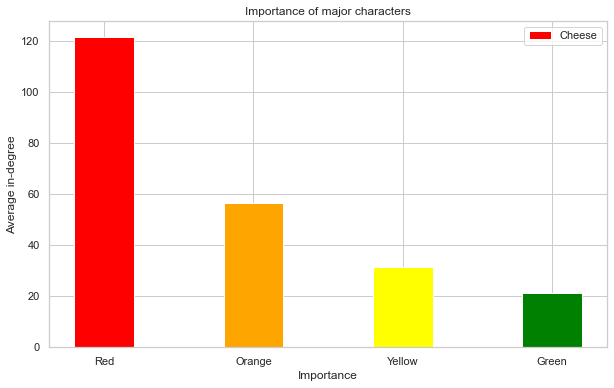

In [100]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Red','Orange','Yellow','Green']
average_in_degree = [np.mean([A[i][1] for i in red_indices]), 
                     np.mean([A[i][1] for i in orange_indices]),
                     np.mean([A[i][1] for i in yellow_indices]),
                     np.mean([A[i][1] for i in green_indices])]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis, average_in_degree, 0.4, label = 'Cheese', color=['Red', "Orange", "Yellow", "Green"])
  
plt.xticks(X_axis, X)
plt.xlabel("Importance")
plt.ylabel("Average in-degree")
plt.title("Importance of major characters")
plt.legend()
plt.show()

In [104]:
df_violin = sns.load_dataset("titanic")
df_violin = pd.DataFrame(list(zip(B, C, D)),
               columns =['Name', 'In-degree', 'Importance'])
df_violin

,Name,In-degree,Importance
0,Thrall,329,red
1,Sylvanas_Windrunner,267,red
2,Jaina_Proudmoore,263,red
3,Anduin_Wrynn,246,orange
4,Garrosh_Hellscream,231,red
...,...,...,...
267,Oculeth,4,green
268,K'ara,4,green
269,Kang,4,orange
270,King_Ymiron,4,green


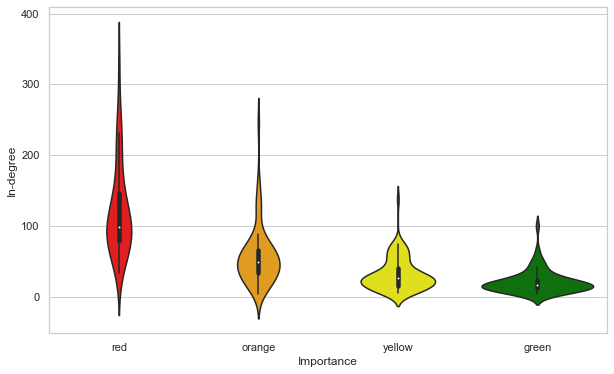

In [109]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='Importance',y='In-degree',palette=['red','orange', 'yellow','green'],data=df_violin)

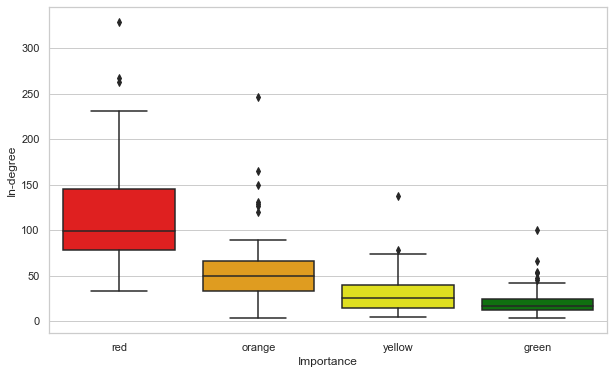

In [110]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x='Importance',y='In-degree',palette=['red','orange', 'yellow','green'],data=df_violin)